# Probability Distributions

In [1]:
from IPython.display import Markdown
base_path = (
    "https://raw.githubusercontent.com/rezahabibi96/GitBook/refs/heads/main/"
    "books/applied-statistics-with-python/.resources"
)

In [ ]:
import math
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm, binom

import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.pyplot import figure

import requests
from io import BytesIO

## Probability Distributions

There are many important probability distributions with numerous applications in Engineering, Biology, Medicine, Finance, etc. In this chapter, only a few distributions that are important in Statistics are considered. 

We have already studied simple finite probability distributions in Chapter 3. The table below, for example, reviews payout distributions for an insurance company.

|              | No Accidents | One Accident  | Two Accidents |
| ------------ | ------------ | ------------- | -----         |
| Payout       | 0            | 5000          | 10000         |
| Probability  | 0.96         | 0.03          | 0.01          |

The above is an example of a **discrete random variable** with a finite set of distinct values, each assigned a specific probability. More generally, a discrete probability distribution can have a **countably infinite** set of outcomes. The only requirements are:

1. $0 \le p(s) \le 1$ for each event $s$ in the sample space $S$
2. $\sum_{s\in S} p(s) = 1$

On the other hand, a **continuous random variable** can take any value within a given range. It is often associated with measurements like height, weight, time, temperature, distance, etc. Unlike discrete random variables, continuous ones have an uncountably infinite number of possible outcomes. Any real number range contains infinitely many values, so the probability of any specific value is 0. Instead, areas under a continuous probability distribution function are used to compute the probabilities. The two requirements for a continuous probability distribution function are:

1. $0 \le f(x) \le 1$ for all $x$
2. $\int_{-\infty}^{\infty} f(x) dx = 1$

For example, an electric outlet voltage varies slightly around the prescribed value of 120 volts. One assumption might be that it has a **uniform distribution** in the range 119–121 V, i.e., the values are spread evenly over the range of possibilities.

For a general **uniform distribution** on the interval $[a,b]$, the probability distribution function is given by:

$$
f(x) = \begin{cases} 
\frac{1}{b-a} & \text{if } a < x < b \\
0 & \text{if } x \le a \text{ or } x \ge b 
\end{cases}
$$

**Example**

$$
f(x) = \begin{cases} 
\frac{1}{121-119} = \frac{1}{2} & \text{if } 119 < x < 121 \\
0 & \text{if } x \le 119 \text{ or } x \ge 121 
\end{cases}
$$

Note that the area under any probability distribution is always 1.

Total Area = base·height = $(b-a) \cdot \frac{1}{b-a} = 1$

The probability of any particular event (interval) is equal to the area under the probability distribution function over that interval. For example, to find the probability that the voltage is between 119 and 120.5 V, we compute:

$$P(119 < V < 120.5) = \text{base} \cdot \text{height} = (120.5 - 119) \cdot \frac{1}{2} = 0.75$$

Also, note that a single particular value has no area, so the probability of it is 0:

$$P(V = 120) = 0$$

We could ask instead for a tight interval around the value of interest:

$$P(119.9 < V < 120.1) = (120.1 - 119.9) \cdot \frac{1}{2} = 0.1$$

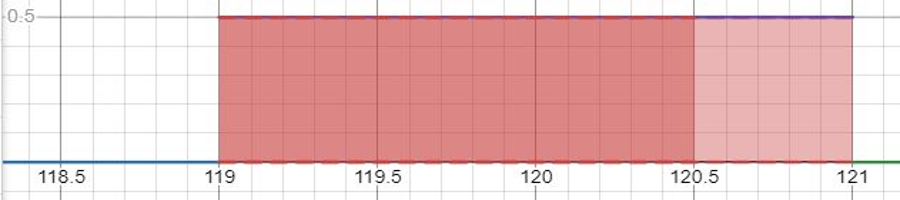

In [4]:
url = f'{base_path}/UniformDistrib.JPG'
page = requests.get(url)
img = Image.open(BytesIO(page.content))
img.resize((900, 200))

## Normal Distribution

### Normal Distribution Model

One of the most important distributions in Statistics is the **normal (bell-shaped)** distribution, which is symmetric and unimodal. The IQ scores, SAT scores, heights, baby weights, and many other practical quantities closely follow such a shape with low probability for more extreme values on both ends and a bell shape in the middle. It is completely described by mean $µ$ (center of the bell curve) and standard deviation $σ$ (spread). The figure below shows a typical distribution of IQ scores with mean 100 and standard deviation 15 (one standard deviation away from the mean is shaded red). Generally, we denote the normal distribution as $N(µ,σ)$.

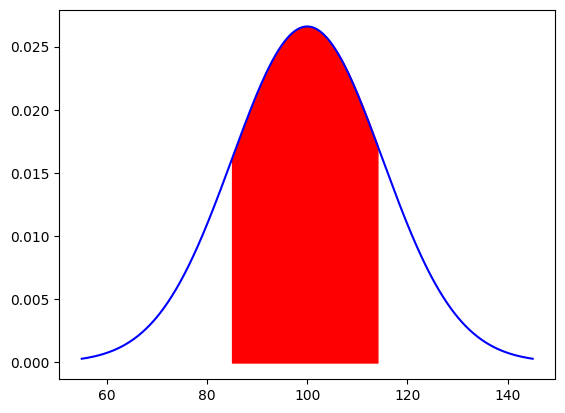

In [ ]:
mu = 100
sig = 15

x = np.linspace(mu-3*sig, mu+3*sig,1000)
plt.plot(x,norm.pdf(x,loc=mu,scale=sig),'b');

px = np.arange(85,115,1)
plt.fill_between(px,norm.pdf(px,loc=mu,scale=sig),color='r');

The probability distribution function is given by:

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

However, one cannot use it to find areas under the curve analytically, only numerically. Changing the mean $µ$ shifts the normal curve horizontally, while $σ$ specifies the spread as illustrated in the figure below. On the left, we show distributions of height for populations of three different countries with means 66 in, 69 in, and 72 in, respectively, but with the same standard deviation of 3 in. On the right, all distributions have the same mean of 69 in, but the standard deviations are 3 in, 6 in, and 9 in, respectively.

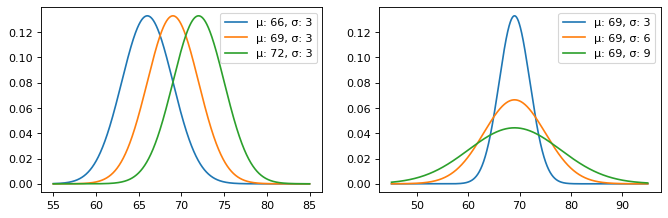

In [12]:
figure(figsize=(10, 3), dpi=80)

plt.subplot(1, 2, 1);
x = np.arange(55, 85, 0.01)
#define multiple normal distributions
plt.plot(x, norm.pdf(x, 66, 3), label='μ: 66, σ: 3');
plt.plot(x, norm.pdf(x, 69, 3), label='μ: 69, σ: 3');
plt.plot(x, norm.pdf(x, 72, 3), label='μ: 72, σ: 3');
plt.legend();

plt.subplot(1, 2, 2);
x = np.arange(45, 95, 0.01)
#define multiple normal distributions
plt.plot(x, norm.pdf(x, 69, 3), label='μ: 69, σ: 3');
plt.plot(x, norm.pdf(x, 69, 6), label='μ: 69, σ: 6');
plt.plot(x, norm.pdf(x, 69, 9), label='μ: 69, σ: 9');
plt.legend();

The normal distribution with mean $µ = 0$ and standard deviation $σ = 1$ is called the **standard normal distribution**. Its probability distribution function is:

$$f(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2/2}$$

It is used to compute the areas under any other normal distribution $N(µ,σ)$, but first, the given distribution must be standardized to a Z-score with mean 0 and standard deviation 1. The **Z-score** is the number of standard deviations above or below the mean:

$$z = \frac{x-µ}{σ}$$

For example, someone with an IQ score of 130 on the standard IQ scale with mean $µ = 100$ and standard deviation $σ = 15$ has the standardized score:

$$z = \frac{x-µ}{σ} = \frac{130-100}{15}$$

On the other hand, a raw score of 85 implies:

$$z = \frac{x-µ}{σ} = \frac{85-100}{15} = -1$$

Generally, any score above the mean leads to positive $z$, and any score below the mean produces negative $z$, while the mean score produces $z = \frac{µ-µ}{σ} = 0$.

Note that you can always subtract the mean and divide by the standard deviation for any distribution, so z-scores can be defined for any type of data/distribution, not just normally distributed. Z-scores are very convenient to compare variables measured on different scales.

For example, let's say in a given year the SAT scores are normally distributed with mean $µ = 1000$ and standard deviation $σ = 250$, and Regents scores are also normally distributed with mean $µ = 60$ and standard deviation $σ = 20$. Let's say Jane got 1210 on her SAT and John got 70 on his Regents exam. The scores are on completely different scales, so we cannot compare them directly. However, we can find the corresponding standardized z-scores.

In [13]:
muSAT = 1000
sigSAT = 250
x1 = 1210
z1 = (x1-muSAT)/sigSAT
print('Jane z score = ', z1)

muReg = 60
sigReg = 20
x2 = 70
z2 = (x2-muReg)/sigReg
print('John z score = ', z2)

Jane z score =  0.84
John z score =  0.5


$$z = \frac{1210-1000}{250} = 0.84$$
$$z = \frac{70-60}{20} = 0.5$$

Therefore, Jane did better on her SAT than John on his Regents test.

### Normal Probability Calculations

Let's now start discussing probability questions for normal distributions.

For example, what is the fraction (percentage) of students who scored **below John's score? Or equivalently, if we select a random student, what is the probability that their score is below 70? This is given by the left-tail area under the normal probability distribution function shown in the figure below.

I created my own (user) function `plot_normal()` with the `def` command. In parentheses, it has its input parameters. This function does not produce any output; it plots the areas under the normal curve with given parameters and the corresponding standard normal area.

In [14]:
mu = 60 # mean
sig = 20 # standard deviation
x = 70 # raw x value
z = (x-mu)/sig
print('z score = {:.4f}'.format(z))

p = norm.cdf(z)
print('probability = {:.4f} \n\n'.format(p))

z score = 0.5000
probability = 0.6915 




In [16]:
def plot_normal(mu,sig,x1,x2,z1,z2):
    # Plotting the shaded areas for normal distribution
    figure(figsize=(10, 3), dpi=80)

    plt.subplot(1, 2, 1)
    xv = np.arange(mu-5*sig, mu+5*sig, 0.01)
    plt.plot(xv, norm.pdf(xv, mu, sig))

    px=np.arange(x1,x2,0.01)
    plt.fill_between(px,norm.pdf(px,mu,sig),color='r')
    
    plt.subplot(1, 2, 2)
    zv = np.arange(-5, 5, 0.01)
    plt.plot(zv, norm.pdf(zv, 0, 1))

    pz=np.arange(z1,z2,0.01)
    plt.fill_between(pz,norm.pdf(pz),color='r')


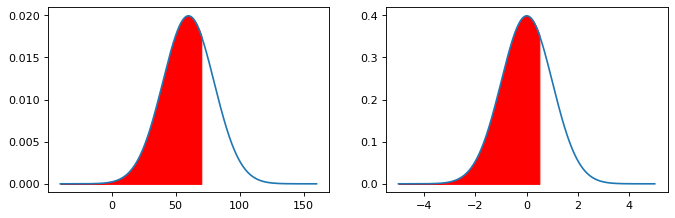

In [17]:
plot_normal(mu=mu,sig=sig,x1=mu-5*sig,x2=x,z1=-5,z2=z)

Therefore, 69.15% of students have scores below John's score of 70.

The next common question to ask would be: what is the fraction (percentage) of students who scored **above** John's score (**at least** as good as John's)? Or equivalently, if we select a random student, what is the probability that their score is above John's score of 70? This is given by the right-tail area under the normal probability distribution function shown in the figure below.

The total area under any probability distribution is 1, so we can find the complement area to the left and then subtract it from 1:

z score = 0.5000
probability = 0.3085 




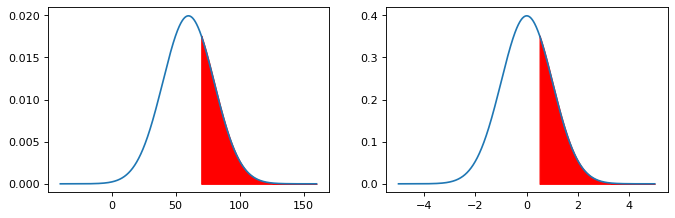

In [18]:
mu = 60 # mean
sig = 20 # standard deviation
x = 70 # raw x value
z = (x-mu)/sig
print('z score = {:.4f}'.format(z))

p = 1-norm.cdf(z)
print('probability = {:.4f} \n\n'.format(p))

plot_normal(mu=mu,sig=sig,x1=x,x2=mu+5*sig,z1=z,z2=5)

Finally, a school board may decide that students who scored **between** 45 and 59 require extra help. What proportion of students falls within these bounds? Or equivalently, what is the probability that a randomly chosen student falls in these bounds?

This probability is best obtained as a **difference** between the probability of scoring below 59 and scoring below 45, as shown in the figure below:

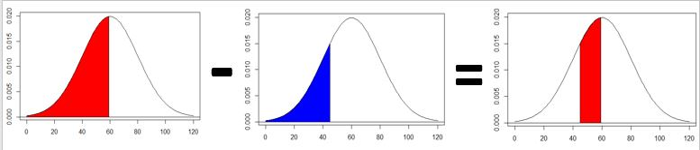

In [19]:
url = f'{base_path}/ProbSubtract.JPG'
page = requests.get(url)
img = Image.open(BytesIO(page.content))
img.resize((700, 150))

z1, z2 scores = -0.7500, -0.0500
probability = 0.2534




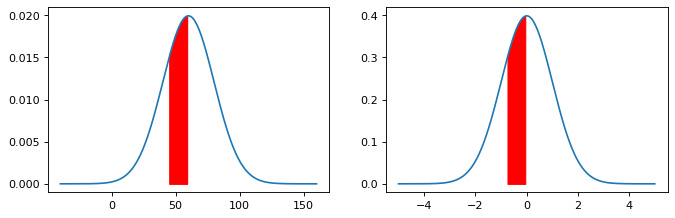

In [20]:
mu = 60 # mean
sig = 20 # standard deviation
x1 = 45 # raw x value
x2 = 59 # raw x value
z1 = (x1-mu)/sig
z2 = (x2-mu)/sig
print('z1, z2 scores = {:.4f}, {:.4f}'.format(z1,z2))

p = norm.cdf(z2)-norm.cdf(z1);
print('probability = {:.4f}\n\n'.format(p))

plot_normal(mu=mu,sig=sig,x1=x1,x2=x2,z1=z1,z2=z2)

The last several problems have focused on finding the percentile (lower tail area) or upper tail area for a particular observation. There is an opposite kind of question — what value (quantile) corresponds to a particular percentile?

For example, what is the value corresponding to the 95th percentile on the Regents test? Or equivalently, which score corresponds to the top 5% on the Regents exam? To answer this question, first, we need to use the inverse function of the cumulative probability distribution (CDF) to find the standardized z-score corresponding to 95% of the data below it, as illustrated in the figure below. Then, find the raw score $x$ from the definition of $z$:

$$z = \frac{x - µ}{σ} \quad \Rightarrow \quad z \cdot σ = x - µ \quad \Rightarrow \quad$$

$$x = µ + z \cdot σ$$

z = 1.6449
raw score x = 92.8971




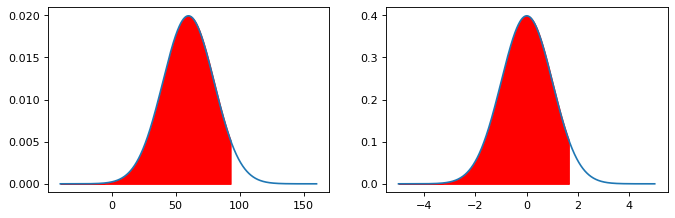

In [21]:
mu = 60 # mean
sig = 20 # standard deviation
ProbLeft = 0.95
z = norm.ppf(ProbLeft)
print('z = {:.4f}'.format(z))

x = mu + z*sig
print('raw score x = {:.4f}\n\n'.format(x))

plot_normal(mu=mu,sig=sig,x1=mu-5*sig,x2=x,z1=-5,z2=z)

The value (quantile) corresponding to the 95th percentile is 92.897. The 50th percentile corresponds to $z = 0$, so the raw score is $x = µ + z \cdot σ = µ + 0 \cdot σ = µ$.

Let's also compute a quantile corresponding to the lower 10th percentile on the Regents test. Or equivalently, which score corresponds to the bottom 10% of scores on the Regents exam? The figure below illustrates the bottom 10% area under the normal distribution.

z = -1.2816
raw score x = 34.3690




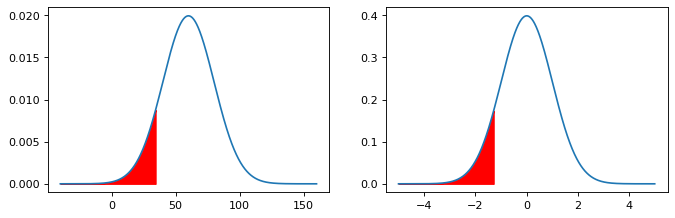

In [22]:
mu = 60 # mean
sig = 20 # standard deviation
ProbLeft = 0.10
z = norm.ppf(ProbLeft)
print('z = {:.4f}'.format(z))

x = mu + z*sig
print('raw score x = {:.4f}\n\n'.format(x))

plot_normal(mu=mu,sig=sig,x1=mu-5*sig,x2=x,z1=-5,z2=z)

The value (quantile) corresponding to the 10th percentile is 34.369. In this case, $z$ is negative and the quantile is below the mean.

### Central Limit Theorem

The Central Limit Theorem (CLT) is perhaps the most amazing scientific result. We will see it again and again throughout the book. For now, we just want to understand it in terms of adjusting standard deviation in normal distribution computation for sample means.

The CLT proves that for a population of **any distribution** with mean $µ$ and standard deviation $σ$, the distribution of the sample means converges to a normal distribution as the sample size $n$ increases ($n \ge 30$ is a common guideline). The mean of this distribution of sample means is the same $µ$, but the standard deviation is much smaller, $\frac{σ}{\sqrt{n}}$, which produces a much sharper normal distribution more centered around the mean.

If the original population is already normally distributed, then CLT holds for a sample of any size.

### Normal Distribution Example

There are many other examples of normal distribution.

**Example**

Let's consider a business-oriented example. Suppose that the gas mileage of a particular type of car is normally distributed with a mean of 22 mpg and a standard deviation of 6 mpg.

First, which percentage of cars has mpg **below** 19 (left tail on the graph shown below)? Or equivalently, if we select a random car, what is the probability that its mpg is below 19?

z score = -0.5000, p = 0.3085


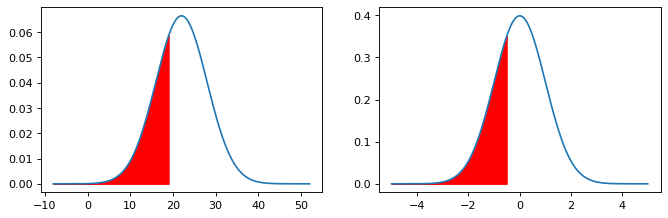

In [23]:
mu = 22 # mean
sig = 6 # standard deviation
x = 19 # raw x value
z = (x-mu)/sig
p = norm.cdf(z)
print('z score = {:.4f}, p = {:.4f}'.format(z,p))

plot_normal(mu=mu,sig=sig,x1=mu-5*sig,x2=x,z1=-5,z2=z)

Therefore, 30.85% of cars have below 19 mpg.

Next, what is the fraction (percentage) of cars with mpg **above** 28 (right tail)? Or equivalently, if we select a random car, what is the probability that its mpg is above 28?

z score = 1.0000, p = 0.1587


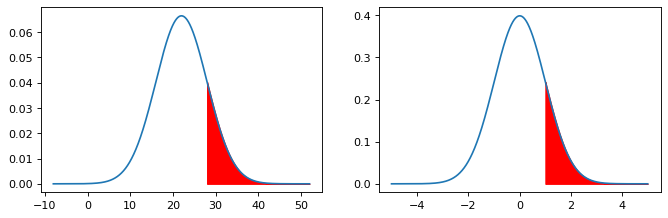

In [24]:
mu = 22 # mean
sig = 6 # standard deviation
x = 28 # raw x value
z = (x-mu)/sig
p = 1-norm.cdf(z)
print('z score = {:.4f}, p = {:.4f}'.format(z,p))

plot_normal(mu=mu,sig=sig,x1=x,x2=mu+5*sig,z1=z,z2=5)

Therefore, 15.86% of cars have an mpg above 28.

Which percentage of cars has good mpg that falls in **between** 20 and 30 mpg as shown in the Figure below? Or equivalently, what is the probability that a randomly chosen car mpg falls in these bounds?

z1 = -0.3333, z2 = 1.3333, p = 0.5393


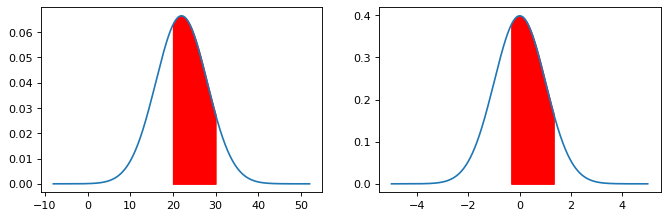

In [25]:
mu = 22 # mean
sig = 6 # standard deviation
x1 = 20 # raw x value
x2 = 30 # raw x value
z1 = (x1-mu)/sig
z2 = (x2-mu)/sig
p = norm.cdf(z2)-norm.cdf(z1)
print('z1 = {:.4f}, z2 = {:.4f}, p = {:.4f}'.format(z1,z2,p))

plot_normal(mu=mu,sig=sig,x1=x1,x2=x2,z1=z1,z2=z2)

Therefore, 53.93% of cars have an mpg between 20 and 30.

Let's also consider the mean of a **sample** of $n = 30$ cars. What is the probability that a **sample mean** mpg is **below** 19? The standard deviation for *sample means* is much smaller according to the CLT:

$$\sigma_x = \dfrac{\sigma}{\sqrt{n}} = \dfrac{6}{\sqrt{30}} = 1.095$$

Note that with much smaller $\sigma_x$, we get a much sharper (tighter) normal distribution and, as a result, much less chance that a sample mean will be below 19 as can be seen in the Figure below.

1 item: z1 score = -0.5000, probability = p1 = 0.3085

mean of n items: zn = -2.7386, pn = 0.0031



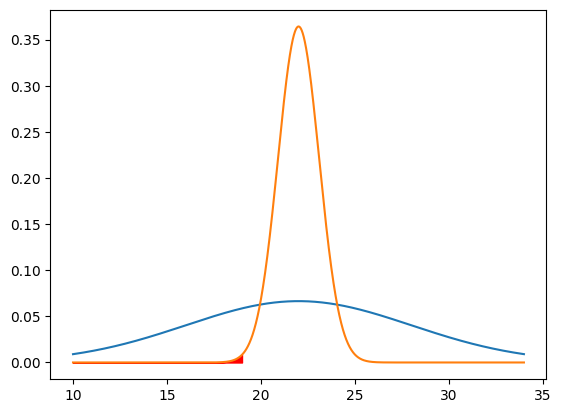

In [26]:
mu = 22 # mean
sig = 6 # standard deviation
x = 19 # raw x value
z1 = (x-mu)/sig;
p1 = norm.cdf(z1);
print('1 item: z1 score = {:.4f}, probability = p1 = {:.4f}\n'.format(z1,p1))

n = 30 # sample size
zn = (x-mu)/(sig/np.sqrt(n))
pn = norm.cdf(zn)
print('mean of n items: zn = {:.4f}, pn = {:.4f}\n'.format(zn,pn))

xv = np.arange(mu-2*sig, mu+2*sig, 0.01)
plt.plot(xv, norm.pdf(xv, mu, sig));
plt.plot(xv, norm.pdf(xv, mu, sig/np.sqrt(n)));

px=np.arange(mu-2*sig,x,0.01)
plt.fill_between(px,norm.pdf(px,mu,sig/np.sqrt(n)),color='r');

Continuing to quantiles, what is the value (quantile) corresponding to the 90th percentile of mpg of cars (this is the value such that 90% of cars have mpg below it)? Or equivalently, which score corresponds to the top 10% of mpg's?
First, let's find the standardized z-score corresponding to the 90th percentile as illustrated in the Figure below.

z = 1.2816
raw score x = 29.6893


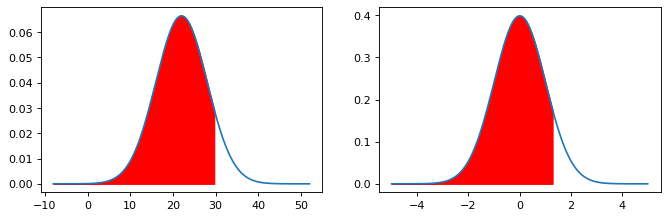

In [27]:
mu = 22 # mean
sig = 6 # standard deviation
ProbLeft = 0.90
z = norm.ppf(ProbLeft)
print('z = {:.4f}'.format(z))

x = mu + z*sig
print('raw score x = {:.4f}'.format(x))

plot_normal(mu=mu,sig=sig,x1=mu-5*sig,x2=x,z1=-5,z2=z)

The value (quantile) corresponding to the 90th percentile is 29.689.

Let's also compute a quantile corresponding to the lower 8th percentile (the value such that only 8% of cars have mpg below it). Or equivalently, which score corresponds to the bottom 8% of the values? As before, find the standardized z-score corresponding to 8% of the data as illustrated in the Figure below, and compute the corresponding raw score.

z = -1.4051
raw score x = 13.5696


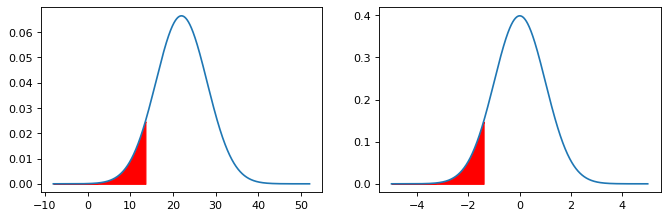

In [28]:
mu = 22 # mean
sig = 6 # standard deviation
ProbLeft = 0.08
z = norm.ppf(ProbLeft)
print('z = {:.4f}'.format(z))

x = mu + z*sig
print('raw score x = {:.4f}'.format(x))

plot_normal(mu=mu,sig=sig,x1=mu-5*sig,x2=x,z1=-5,z2=z)

The value (quantile) corresponding to the 8th percentile is 13.57. In this case, $z$ is negative, and the quantile is below the mean.

**Example**

The distribution of baby weights is known to be normal with a mean around 3400 g and a standard deviation of approximately 600 g.

Which percentage of baby weights is **below** 4000 g? Equivalently, for a randomly chosen baby, what is the probability that the weight is below 4000 g?
This is given by the left tail area under the normal probability distribution function shown in the Figure below.

z score = 1.0000, probability = 0.8413


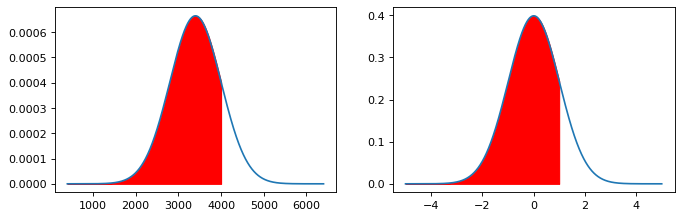

In [29]:
mu = 3400 # mean
sig = 600 # standard deviation
x = 4000 # raw x value
z = (x-mu)/sig 
p = norm.cdf(z)
print('z score = {:.4f}, probability = {:.4f}'.format(z,p))

plot_normal(mu=mu,sig=sig,x1=mu-5*sig,x2=x,z1=-5,z2=z)

Next, what is the fraction (percentage) of babies who are heavier than (weighing more than) 4500? Equivalently, for a randomly chosen baby, what is the probability that the weight is **above** 4500? This is given by the right tail area under the normal probability distribution function shown below:

z score = 1.8333, probability = 0.0334


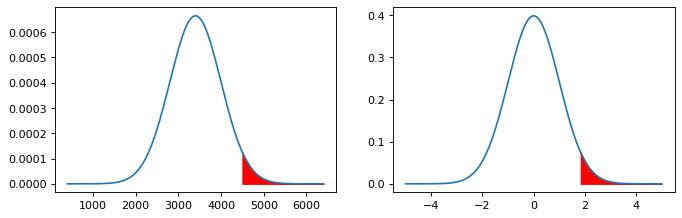

In [30]:
mu = 3400; # mean
sig = 600; # standard deviation
x = 4500; # raw x value
z = (x-mu)/sig
p = 1-norm.cdf(z)
print('z score = {:.4f}, probability = {:.4f}'.format(z,p))

plot_normal(mu=mu,sig=sig,x1=x, x2=mu+5*sig,z1=z,z2=5)


Which fraction (percentage) of babies have a weight **between** 2200 and 4600 g as shown in the Figure below? Equivalently, for a randomly chosen baby, what is the probability that their weight is within the above bounds?

z1, z2 scores = -2.0000, 2.0000
probability = 0.9545




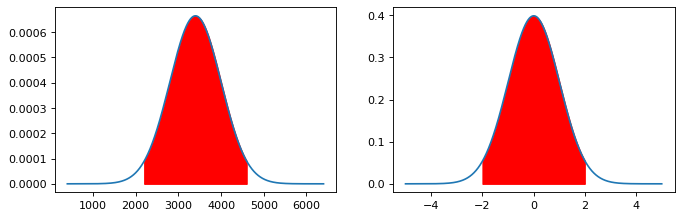

In [31]:
mu = 3400 # mean
sig = 600 # standard deviation
x1 = 2200 # raw x value 
x2 = 4600 # raw x value
z1 = (x1-mu)/sig; z2 = (x2-mu)/sig
print('z1, z2 scores = {:.4f}, {:.4f}'.format(z1,z2))

p = norm.cdf(z2)-norm.cdf(z1)
print('probability = {:.4f}\n\n'.format(p))

plot_normal(mu=mu,sig=sig,x1=x1,x2=x2,z1=z1,z2=z2)

The above is close to 95%, but not quite. Let's consider the middle 95% of data in more detail. First, let's determine the quantile or baby's weight corresponding to the 97.5th percentile (i.e., the weight such that 97.5% of babies have lower weights). Equivalently, which weight separates the top 2.5% of baby weights?

z = 1.9600
raw score x = 4575.9784


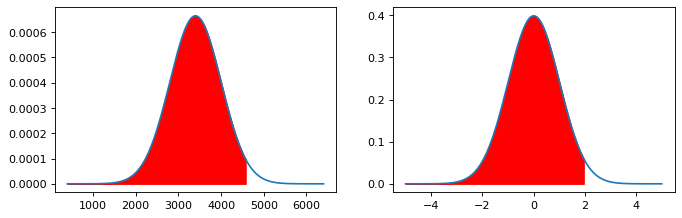

In [32]:
mu = 3400 # mean
sig = 600 # standard deviation
ProbLeft = 0.975
z = norm.ppf(ProbLeft) 
print('z = {:.4f}'.format(z))

x = mu + z*sig 
print('raw score x = {:.4f}'.format(x))

plot_normal(mu=mu,sig=sig,x1=mu-5*sig,x2=x,z1=-5,z2=z)


Analogously, which weight (quantile) corresponds to the lower 2.5th percentile of baby weights (i.e., what is the weight such that only 2.5% of babies have weights below it)? Equivalently, which weight separates the bottom 2.5% of baby weights?

z = -1.9600
raw score x = 2224.0216


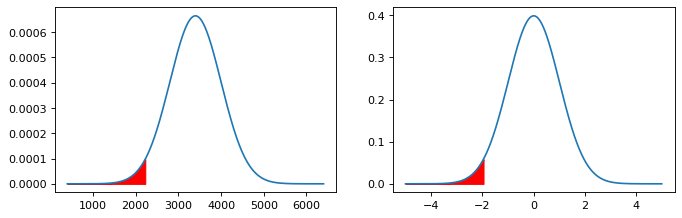

In [33]:
mu = 3400 # mean
sig = 600 # standard deviation
ProbLeft = 0.025
z = norm.ppf(ProbLeft)
print('z = {:.4f}'.format(z))

x = mu + z*sig 
print('raw score x = {:.4f}'.format(x))

plot_normal(mu=mu,sig=sig,x1=mu-5*sig,x2=x,z1=-5,z2=z)

The quantiles are approximately 2224 g for the 2.5th percentile and 4576 g for the 97.5th percentile. These bounds contain the middle 95% of the data. Medical professionals usually use them to define cutoffs for low birth weight and high birth weight babies requiring special medical attention.

Let's also illustrate the CLT by comparing the probability for one baby to have a weight more than, say, 3600 g and for a **sample** of $n = 30$ babies to have average weight above 3600 g. For the sample, we must adjust the sample standard deviation:

$$\sigma_x = \dfrac{\sigma}{\sqrt{n}} = \dfrac{600}{\sqrt{30}} = 109.545$$

As always, $\sigma_x$ is much smaller than $\sigma$, so the sample means normal distribution is much sharper (tighter), and there is much less chance that a sample mean will be above 3600 as can be seen in the Figure below.

1 item: z1 score = 0.3333, probability = p1 = 0.3694

mean of n items: zn = 1.8257, pn = 0.0339



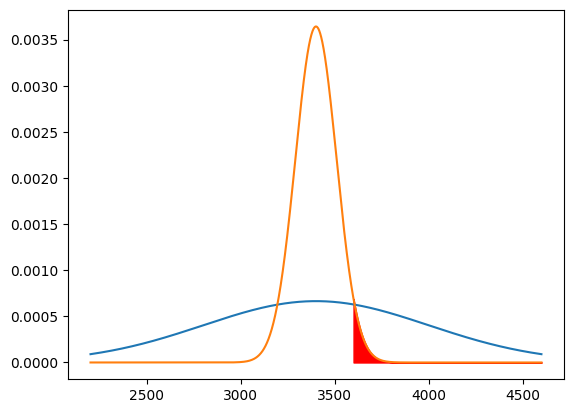

In [36]:
mu = 3400 # mean
sig = 600 # standard deviation
x = 3600 # raw x value
z1 = (x-mu)/sig 
p1 = 1-norm.cdf(z1);
print('1 item: z1 score = {:.4f}, probability = p1 = {:.4f}\n'.format(z1,p1))

n = 30; # sample size
zn = (x-mu)/(sig/np.sqrt(n)) 
pn = 1-norm.cdf(zn);
print('mean of n items: zn = {:.4f}, pn = {:.4f}\n'.format(zn,pn))

xv = np.arange(mu-2*sig, mu+2*sig, 0.01)
plt.plot(xv, norm.pdf(xv, mu, sig));
plt.plot(xv, norm.pdf(xv, mu, sig/np.sqrt(n)));

px=np.arange(x,mu+2*sig,0.01)
plt.fill_between(px,norm.pdf(px,mu,sig/np.sqrt(n)),color='r');

### 68-95-99.7 Rule

We mentioned in the previous chapter that for the bell-shaped data, there are certain percentages of the data falling within 1, 2, and 3 standard deviations of the mean. Let's formalize it more precisely here. First, rewrite this in terms of $z$.

Say, 1 standard deviation away from the mean results in:

$$z = \dfrac{(\mu \pm \sigma) - \mu}{\sigma} = \dfrac{\pm \sigma}{\sigma} = \pm 1$$

Analogously, for 2 standard deviations:

$$z = \dfrac{(\mu \pm 2\sigma) - \mu}{\sigma} = \dfrac{\pm 2\sigma}{\sigma} = \pm 2$$

The area under the normal probability distribution function contained within $z = \pm 1$, $\pm 2$, and $\pm 3$ is computed as follows:

In [37]:
print('Areas under the standard normal probability distribution')

p1 = norm.cdf(1)-norm.cdf(-1)
print('Between -1 to 1 = {:.4f}'.format(p1))

p2 = norm.cdf(2)-norm.cdf(-2)
print('Between -2 to 2 = {:.4f}'.format(p2))

p3 = norm.cdf(3)-norm.cdf(-3)
print('Between -3 to 3 = {:.4f}'.format(p3))

Areas under the standard normal probability distribution
Between -1 to 1 = 0.6827
Between -2 to 2 = 0.9545
Between -3 to 3 = 0.9973


Therefore, all the standard percentages given in the Figure below check out.

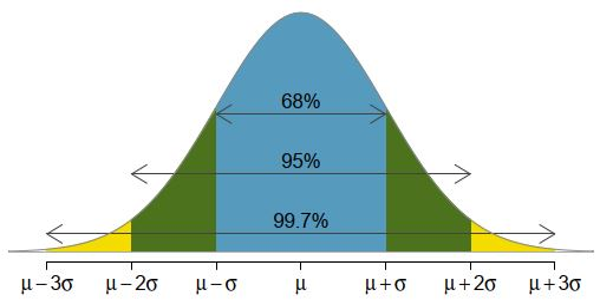

In [39]:
url = f'{base_path}/Normal6895.JPG'
page = requests.get(url)
img = Image.open(BytesIO(page.content))
img.resize((600, 300))

Let's make this statement just a bit more precise with a quantile approach.
If we want exactly 95% of the data in the middle, we need to find z-scores corresponding to 2.5% on the left and 97.5% on the right.

The normal distribution is symmetric, so these values have the same magnitude, just opposite signs. They are approximately $z = \pm 1.960$, which is quite close to $z = \pm 2$, but not the same, as shown in the Figure below.

z1 = -1.9600, z2 = 1.9600



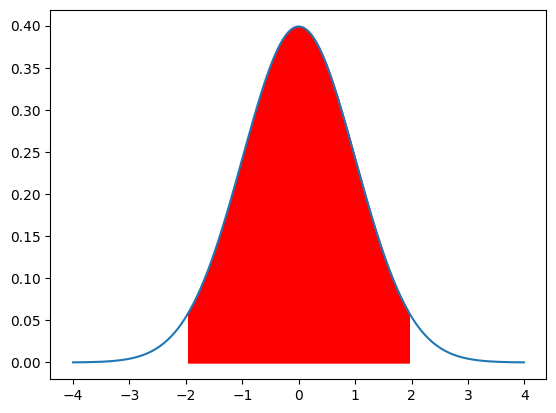

In [40]:
ProbLeft = 0.025
z1 = norm.ppf(ProbLeft)
ProbLeft = 0.975
z2 = norm.ppf(ProbLeft)
print('z1 = {:.4f}, z2 = {:.4f}\n'.format(z1,z2))

zv = np.arange(-4, 4, 0.01)
plt.plot(zv, norm.pdf(zv, 0, 1));

pz=np.arange(z1,z2,0.01)
plt.fill_between(pz,norm.pdf(pz),color='r');

The Standard Normal distribution has $e^{-x^2/2}$ term which decreases to 0 very fast but never touches or crosses it, so a normal random variable can fall 4, 5, or even more standard deviations away from the mean, but it is very unlikely as shown below.

In [41]:
print('Areas under the standard normal probability distribution')

print('Area above 4 = {:.16f}'.format(1-norm.cdf(4)))
print('Area above 5 = {:.16f}'.format(1-norm.cdf(5)))
print('Area above 6 = {:.16f}'.format(1-norm.cdf(6)))
print('Area above 10 = {:.16f}'.format(1-norm.cdf(10)))

Areas under the standard normal probability distribution
Area above 4 = 0.0000316712418331
Area above 5 = 0.0000002866515719
Area above 6 = 0.0000000009865877
Area above 10 = 0.0000000000000000


## Binomial Distribution

Consider flipping a coin 10 times, say. Each coin flip (**trial**) can result in only two outcomes H or T with fixed probability, **independent** of each other.
Define a random variable as the number of heads in these 10 coin flips. This is an example of **Binomial Distribution**. Thus, it is used to describe the following situation: there are $n$ independent trials, each one is either success or failure with fixed probability, and we look at the distribution of the number of successes.

Another basic example might be rolling a fair die. One might argue that it does not provide two outcomes, but 6. However, if we denote success as rolling 6 (or any other outcome), then we can have, say, $n = 20$ independent die rolls (trials), each one is either a success (rolling 6 with probability $1/6$) or failure (rolling anything else with probability $5/6$). Then, the distribution of the number of successes is Binomial.

Individual trials resulting in success (probability $p$) or failure ($1-p$) are called Bernoulli trials. The Binomial distribution is a sum of such Bernoulli trials.
**Bernoulli random variable** has distribution:

$$f(x) = \begin{cases}
p & \text{if } x = 1 \text{ (success)} \\
1 - p & \text{if } x = 0 \text{ (failure)}
\end{cases}$$

The expected value is:

$$\mu = E(X) = \sum_x X_x \cdot P(X = x) = 1 \cdot p + 0 \cdot (1 - p) = p$$

The standard deviation is:

$$\sigma = \sqrt{\sum_X (x - \mu)^2 \cdot P(X = x)} = \sqrt{(1 - p)^2 \cdot p + (0 - p)^2 \cdot (1 - p)}$$

$$= \sqrt{p(1 - p)(1 - p + p)} = \sqrt{p(1 - p)}$$

Bernoulli's random variable provides a way to connect means and proportions. Assume 10 Bernoulli trials are observed and result in $x = (1, 0, 0, 1, 0, 1, 0, 0, 0, 1)$. The mean is

$$\bar{x} = \dfrac{\sum x_i}{n} = \dfrac{1 + 0 + 0 + 1 + 0 + 1 + 0 + 0 + 0 + 1}{10} = \dfrac{4}{10}$$

$$= \dfrac{\text{number of successes}}{\text{number of trials}} = \text{proportion successes } \hat{p}$$

Therefore, proportion can be represented as a mean.

### Permutations and Combinations

To derive the Binomial formula, we need to make a very short detour into an intricate subject of Combinatorics.
First, let's remind ourselves of the definition of factorial:

$n! = n \cdot (n - 1) \cdot (n - 2) \cdot (n - 3) \cdot ... \cdot 3 \cdot 2 \cdot 1 = n \cdot (n - 1)!$

For example:

$0! = 1$

$1! = 1$

$2! = 2 \cdot 1 = 2$

$3! = 3 \cdot 2 \cdot 1 = 6$

$4! = 4 \cdot 3 \cdot 2 \cdot 1 = 24$

$5! = 5 \cdot 4 \cdot 3 \cdot 2 \cdot 1 = 120$

$6! = 6 \cdot 5 \cdot 4 \cdot 3 \cdot 2 \cdot 1 = 720$

The factorials grow very fast.

Consider a Business department with 7 faculty members. How many ways are there to choose a chair, associate chair, and treasurer (7 distinct items, 3 slots)? Note here that the **order matters**. There are 7 ways to choose the chair, 6 ways to choose an associate chair from the remaining 6 people, and 5 ways to choose the treasurer from the remaining 5. This is called **the number of permutations**. We can represent it with factorials:

$$7P3 = 7 \cdot 6 \cdot 5 = \dfrac{7 \cdot 6 \cdot 5 \cdot 4 \cdot 3 \cdot 2 \cdot 1}{4 \cdot 3 \cdot 2 \cdot 1} = \dfrac{7!}{4!} = \dfrac{7!}{(7 - 3)!} = 210$$

Generally, if we are given $n$ different items to select $r$ items when **order is important**, then **the number of permutations** is:

$$nPr = \dfrac{n!}{(n - r)!}$$

How many ways are there to sit these faculty members around the table? Once again, order matters, and we have 7 ways to choose a person for the 1st chair, 6 ways for the 2nd, etc., so:

$$7 \cdot 6 \cdot 5 \cdot 4 \cdot 3 \cdot 2 \cdot 1 = 7! = 7P7$$

Generally,

$$nPn = \dfrac{n!}{(n - n)!} = \dfrac{n!}{0!} = \dfrac{n!}{1} = n!$$

On the other hand, let's consider how many ways to choose 3 faculty members for a committee. In this case, the **order does NOT matter**. We know that there are $7P3$ ways to choose 3 out of 7 when order does matter. For each of these choices, there are $3!$ ways to arrange 3 faculty members inside the chosen group. Therefore, **the number of combinations (order does not matter)** of 3 items selected from 7 different items is:

$$7C3 = \dfrac{7P3}{3!} = \dfrac{7!}{4! \cdot 3!} = \dfrac{7 \cdot 6 \cdot 5}{6} = 35$$

Generally, **the number of combinations (order does not matter)** of $r$ items selected from $n$ different items is:

$$nCr = \dfrac{n!}{r!(n - r)!}$$

here are many examples of the number of combinations. For example, how many different Poker hands can one draw from a standard deck of 52 cards?
A poker hand is 5 cards, and it does not matter in which order they come; therefore, the number of combinations is:

$$52C5 = \dfrac{52!}{5! \cdot 47!} = 2{,}598{,}960$$

Another standard example is a State Lottery. How many ways to choose 6 balls out of 50 numbered balls? Note that you win if you have the correct numbers in **any order**, so order does not matter and we use combinations:

$$50C6 = \dfrac{50!}{6! \cdot 44!} = 15{,}890{,}700$$

Therefore, if you buy one lottery ticket, your chance to win is $\frac{1}{15890700}$. The computations above are illustrated in the Python code below.

In [44]:
fact = math.factorial(7)
print('factorial of 7 = ',fact )

fact = math.factorial(50)
print('factorial of 50 = ',fact )

nPr = math.perm(7,3)
print('7P3 = ',nPr )

nCr = math.comb(7,3)
print('7C3 = ',nCr )

nCr = math.comb(52,5)
print('52C5 = ',nCr )

nCr = math.comb(50,6)
print('50C6 = ',nCr )

P = 1/nCr
print('Prabablity to win = ',P )

factorial of 7 =  5040
factorial of 50 =  30414093201713378043612608166064768844377641568960512000000000000
7P3 =  210
7C3 =  35
52C5 =  2598960
50C6 =  15890700
Prabablity to win =  6.292988980976294e-08


### Binomial Formula

Consider a medical science example to introduce the Binomial formula. Let's assume a new drug is tested. It either has an effect (success) or does not (failure). In the course of a clinical trial, this drug is administered to a group of $n$ independent patients, and the outcome for each patient is binary—either there is an intended effect with pre-clinical trial probability $p$ or not (with a complement probability $1 - p$).

To understand the formula, let's start with an extremely small sample of size $n = 3$ patients recorded as A, B, and C and probability of success $p = 0.87$. What is the probability that the drug has the intended effect in exactly 2 patients? There are 3 options for that, and the probability is found using independence of the patients:

$$P(A = \text{yes}, B = \text{yes}, C = \text{no}) = 0.87 \cdot 0.87 \cdot 0.13$$
$$P(A = \text{yes}, B = \text{no}, C = \text{yes}) = 0.87 \cdot 0.13 \cdot 0.87$$
$$P(A = \text{no}, B = \text{yes}, C = \text{yes}) = 0.13 \cdot 0.87 \cdot 0.87$$

These probabilities are the same, and the probability that the drug works on exactly two patients is:

$$P = (\text{number of ways}) \cdot P(\text{one way}) = 3 \cdot 0.87^2 \cdot 0.13 = 3C2 \cdot 0.87^2 \cdot 0.13$$

The number of combinations $3C2$ is used because the order of successes and failures makes no difference in the equation.

Generalizing, consider a binomial distribution with $n$ independent trials, each one is either a success with probability $p$ or failure with probability $1 - p$. Let $X$ be the number of successes. Then:

$$P(X = k) = (\text{number of ways } k \text{ successes and } (n-k) \text{ failures}) \cdot P(\text{one way})$$
$$P(X = k) = nCk \cdot p \cdot p \cdots p \cdot (1 - p) \cdot (1 - p) \cdots (1 - p)$$
$$P(X = k) = nCk , p^k (1 - p)^{n-k} = \dfrac{n!}{k!(n - k)!} p^k (1 - p)^{n-k}$$

Like any other standard distribution, there are well-known formulas for mean and standard deviation of the Binomial Distribution:

$$\mu = E = n \cdot p$$
$$\sigma = \sqrt{n \cdot p \cdot (1 - p)}$$

We would not have to compute using basic formulas $\mu = E = \sum x_i \cdot P(X = x_i)$ and $\sigma = \sqrt{\sum (x_i - \mu)^2 \cdot P(X = x_i)}$ from scratch.

A very small sample of size $n = 3$ was used just to illustrate the formula. More realistically, consider a random sample of $n = 25$ **independent** patients, for each one either the drug works (success $p = 0.87$) or it doesn't (failure $1 - p = 1 - 0.87 = 0.13$). Let's illustrate typical questions for Binomial distribution.

First, let's find what is the probability that the drug works for 20 patients:

$$P(X = 20) = \dfrac{25!}{20!  5!}  0.87^{20}  0.13^5$$

In [46]:
n = 25
p = 0.87
p1 = binom.pmf(k=20,n=n,p=p)
print('p1 = {:.4f}'.format(p1))

p1 = 0.1217


We can compute this probability for any number of successes in the range $k = 0 \dots n$, which produces the **Probability Distribution Function (PDF)** shown as a barplot below.

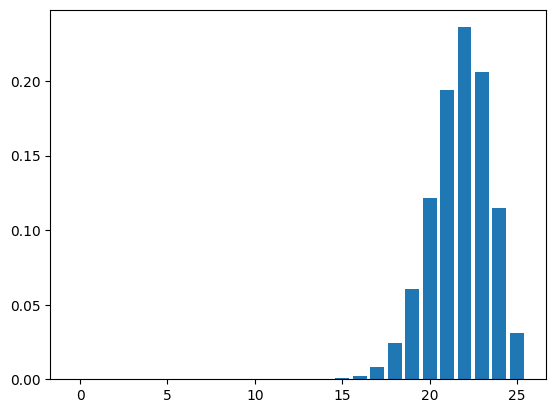

In [48]:
kv = np.arange(n+1)
pv = binom.pmf(k=kv,n=25,p=0.87)
plt.bar(kv, pv);

Next, what is the probability that 20 **or fewer** (**fewer than** 21) patients responded well to this drug?

$$P(X \le 20) = P(X = 0) + P(X = 1) + P(X = 2) + \dots + P(X = 20)$$

It is exactly what is called the **Cumulative Distribution Function (CDF)**:

In [49]:
p2 = binom.cdf(k=20,n=n,p=p)
print('p2 = {:.4f}'.format(p2))

p2 = 0.2183


Alternatively, we can ask what is the probability that 21 **or more** (**more than** 20) patients responded well to the drug? This is the complement of the previous question, so it can be computed as:

In [50]:
p3 = 1-p2
print('p3 = {:.4f}'.format(p3)) # OR

p3 = 1-binom.cdf(k=20,n=n,p=p)
print('p3 = {:.4f}'.format(p3))

p3 = 0.7817
p3 = 0.7817


Next, let's consider the probability that between 16 and 21 patients responded well to the drug. Unlike a continuous distribution, for any discrete distribution, the “in-between” question requires subtracting one from the lower limit so that this value is included:

In [51]:
p4 = binom.cdf(k=21,n=n,p=p) - binom.cdf(k=15,n=n,p=p)
print('p4 = {:.4f}'.format(p4))

p4 = 0.4116


Finally, let's find the mean and standard deviation of this distribution.

In the code below, we have also included $\mu \pm 2\sigma$ bounds of usual values (at least 75% by Chebyshev Theorem). The barplot of the probability distribution shows a similar range of likely outcomes.

In [52]:
mu = n*p
sig = np.sqrt(n*p*(1-p))
print('mean mu = {:.4f}, standard deviation = {:.4f}'.format(mu,sig))
print('usual range {:.4f}, {:.4f} '.format(mu-2*sig, mu+2*sig))

mean mu = 21.7500, standard deviation = 1.6815
usual range 18.3870, 25.1130 


Note that the designation of success or failure in the Binomial distribution setup is somewhat arbitrary and may not correspond to common-sense success. For example, in the problem below the event is a patient experiencing negative side effects of the drug, which is not a success. However, all that matters is that the outcome is binary and we stay consistent.

**Example**

Consider a drug with a 3% side effect rate. In a random sample of $n = 20$ (**independent**) patients, each one either has a side effect ($p = 0.03$) or does not ($1 - p = 1 - 0.03 = 0.97$).

In the Python code below, the same questions as in the previous problem are considered. We only show the theoretical answer for one of them in terms of the Binomial formula with factorials. What is the probability that 2 patients have side effects?

$$P(X = 2) = \dfrac{20!}{2! 18!}  0.03^2  0.97^{18}$$

Probability of 2 out of 20 = p1 = 0.0988

Probability of 2 or less out of 20 = p2 = 0.9790

Probability of 3 or more out of 20 = p3 = 0.0210

Probability between 2 to 3 = 0.1172

mean mu = 0.6000, standard deviation = 0.7629
usual range -0.9258, 2.1258 


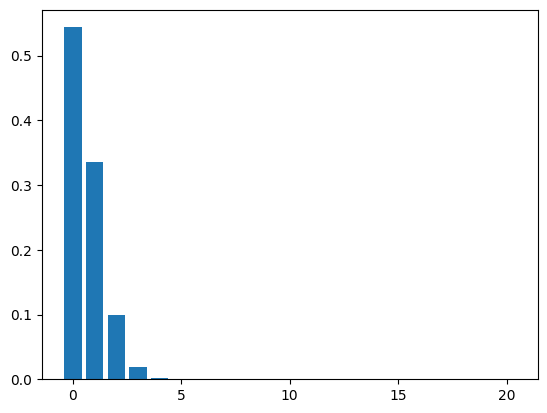

In [53]:
n = 20
p = 0.03
k = 2
p1 = binom.pmf(k=k,n=n,p=p)
print('Probability of {:d} out of {:d} = p1 = {:.4f}\n'.format(k,n,p1))

kv = np.arange(n+1)
pv = binom.pmf(k=kv,n=n,p=p)
plt.bar(kv, pv);

p2 = binom.cdf(k=k,n=n,p=p)
print('Probability of {:d} or less out of {:d} = p2 = {:.4f}\n'.format(k,n,p2))

p3 = 1-binom.cdf(k=k,n=n,p=p)
print('Probability of {:d} or more out of {:d} = p3 = {:.4f}\n'.format(k+1,n,p3))

p4 = binom.cdf(k=3,n=n,p=p) - binom.cdf(k=1,n=n,p=p)
print('Probability between 2 to 3 = {:.4f}\n'.format(p4))

mu = n*p
sig = np.sqrt(n*p*(1-p))
print('mean mu = {:.4f}, standard deviation = {:.4f}'.format(mu,sig))
print('usual range {:.4f}, {:.4f} '.format(mu-2*sig, mu+2*sig))

The barplot above shows the probability distribution for the number of side effects.

**Example**

Here is a quality control example. Suppose about 8% of all computer chips produced by a manufacturing firm are defective. Assume there are $n = 45$ (**independent**) chips selected at random; each chip is either defective ($p = 0.08$) or not ($1 - p = 1 - 0.08 = 0.92$).

Once again, the questions are shown computationally; we only mention one Binomial formula with factorials. What is the probability that 4 chips are defective?

$$P(X = 4) = \dfrac{45!}{4! 41!}  0.08^4  0.92^{41}$$

Probability of 4 out of 45 = p1 = 0.1999

Probability of 4 or less out of 45 = p2 = 0.7098

Probability of 5 or more out of 45 = p3 = 0.2902

Probability to get k or more defective chips:
    kv      pv
0    0  0.9765
1    1  0.8847
2    2  0.7090
3    3  0.4901
4    4  0.2902
5    5  0.1476
6    6  0.0650
7    7  0.0250
8    8  0.0084
9    9  0.0025
10  10  0.0007 

Probability between 2 to 9 = 0.8822

mean mu = 3.6000, standard deviation = 1.8199
usual range -0.0398, 7.2398 


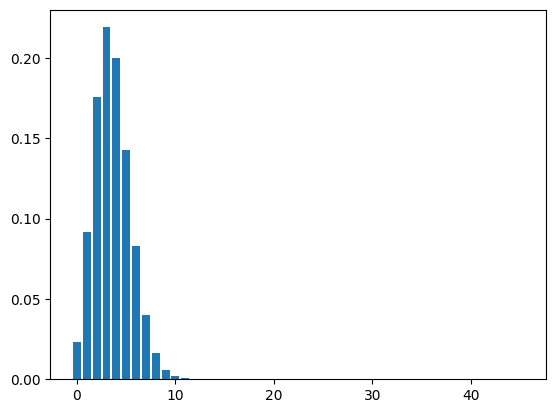

In [54]:
n = 45
p = 0.08
k = 4
p1 = binom.pmf(k=k,n=n,p=p)
print('Probability of {:d} out of {:d} = p1 = {:.4f}\n'.format(k,n,p1))

kv = np.arange(n+1)
pv = binom.pmf(k=kv,n=n,p=p)
plt.bar(kv, pv);

p2 = binom.cdf(k=k,n=n,p=p)
print('Probability of {:d} or less out of {:d} = p2 = {:.4f}\n'.format(k,n,p2))

p3 = 1-binom.cdf(k=k,n=n,p=p)
print('Probability of {:d} or more out of {:d} = p3 = {:.4f}\n'.format(k+1,n,p3))

# I would add here a calculation for different number of defective chips
kv = np.arange(11)
pv = 1-binom.cdf(k=kv,n=n,p=p)
df = pd.DataFrame({'kv':kv,'pv':pv})
print('Probability to get k or more defective chips:')

pd.set_option("display.precision", 4); print(df,'\n')

p4 = binom.cdf(k=9,n=n,p=p) - binom.cdf(k=1,n=n,p=p)
print('Probability between 2 to 9 = {:.4f}\n'.format(p4))

mu = n*p
sig = np.sqrt(n*p*(1-p))
print('mean mu = {:.4f}, standard deviation = {:.4f}'.format(mu,sig))
print('usual range {:.4f}, {:.4f} '.format(mu-2*sig, mu+2*sig))

Once again, the Figure above shows the probability distribution.

### Normal Approximation of the Binomial Distribution

For larger sample sizes $n$, the Binomial Distribution is well approximated by the Normal Distribution. It also avoids the computation of large factorials $n!$, which may not even fit in computer memory directly, although Python `binom.pmf()` and `binom.cdf()` can still compute precisely even for large sample sizes.

In the previous example about defective computer chips, the sample size was not small, $n = 45$, but the distribution was a little skewed right. Let's increase the sample (batch) size to $n = 300$; then, as the Figure below shows, the Binomial distribution looks exactly bell-shaped (Normal distribution).

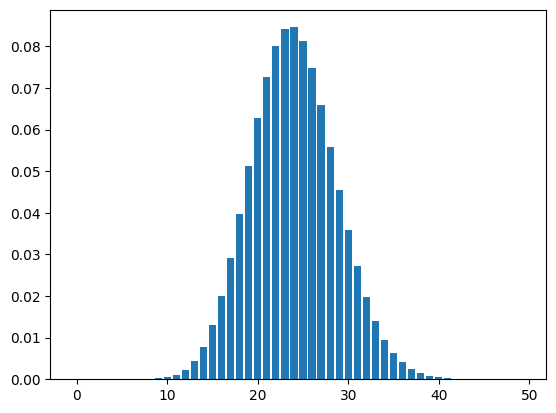

In [55]:
n = 300
p = 0.08
kv = np.arange(50)
pv = binom.pmf(k=kv,n=n,p=p)
plt.bar(kv, pv);

The binomial distribution $B(n, p)$ with size $n$ and probability $p$ is **nearly normal** when the sample size is large enough to satisfy the **(success/failure) conditions**:

$$n \cdot p \ge 10 \text{ and } n \cdot (1 - p) \ge 10$$

Then, the approximate normal has the same mean and standard deviation as the “parent” binomial distribution:

$$\mu = n \cdot p$$
$$\sigma = \sqrt{n \cdot p \cdot (1 - p)}$$

Returning to the defective chips problem:
For $n = 45$ and $p = 0.08$ then

$$n \cdot p = 45 \cdot 0.08 = 3.6 < 10$$
$$n \cdot (1 - p) = 45 \cdot 0.92 = 41.4 \ge 10$$

so the success/failure conditions fail, the distribution is still a bit skewed, and normal approximation should not be used.

For $n = 300$ and $p = 0.08$, the conditions become:

$$n \cdot p = 300 \cdot 0.08 = 24 \ge 10$$
$$n \cdot (1 - p) = 300 \cdot 0.92 = 276 \ge 10$$

So the success/failure conditions are satisfied and the distribution is bell-shaped. In this case, the normal approximation is appropriate.

Consider the probability that there would be 30 or more defective chips. Using the Binomial formula directly, we obtain:

$$P(X \ge 30) = \sum_{k=30}^{300} \dfrac{300!}{k!(300 - k)!} 0.08^k 0.92^{300-k}$$

This is impossible to compute directly term-by-term. Python's 'binom.cdf()' can still give the exact answer to be compared to the normal approximation.

In [56]:
# Exact computation
n = 300
p = 0.08
pb = 1-binom.cdf(k=29,n=n,p=p)
print('Binomial probability 30 or more defective = pb = {:.6f}\n'.format(pb))

# Apply normal approximation
print('Success/failure validity check >= 10: n*p,n*(1-p)', n*p,n*(1-p))

mu = n*p
sig = np.sqrt(n*p*(1-p))
print('mean mu = {:.4f}, standard deviation = {:.4f}'.format(mu,sig))

# without the continuity correction:
z = (30 - mu)/sig
pn = 1-norm.cdf(z)
print('Standard z = {:.4f}, approx prob pn ={:.4f}'.format(z,pn))

Binomial probability 30 or more defective = pb = 0.122641

Success/failure validity check >= 10: n*p,n*(1-p) 24.0 276.0
mean mu = 24.0000, standard deviation = 4.6989
Standard z = 1.2769, approx prob pn =0.1008


The answers are somewhat close, but it is not a reasonable approximation.
When we approximate a discrete distribution with a continuous probability distribution, the **continuity correction** is needed, which adds or subtracts 0.5 as necessary to correct for the difference.

In [57]:
# with the continuity correction:
z = (30 -0.5 - mu)/sig
pn = 1-norm.cdf(z)
print('Standardized z = {:.4f}, approximate probability pn ={:.4f}'.format(z,pn))

Standardized z = 1.1705, approximate probability pn =0.1209


This approximation with the continuity correction is much closer to the exact answer. Such a continuity correction is even more important for the probability of a small interval.

For example, what is the probability that the number of defective chips is between 25 and 35?

In [58]:
pb = binom.cdf(k=35,n=n,p=p) - binom.cdf(k=24,n=n,p=p)
print('Binomial probability pb = {:.4f}\n'.format(pb))
print('Without the continuity correction:')

z1 = (25 - mu)/sig
z2 = (35 - mu)/sig
print('standardized scores: z1 = {:.4f}, z2 = {:.4f}'.format(z1, z2))

pn = norm.cdf(z2)-norm.cdf(z1)
print('approximate probability pn = {:.4f}'.format(pn))
print('\nWith the continuity correction:')

z1 = (25-0.5 - mu)/sig
z2 = (35+0.5 - mu)/sig
print('standardized scores: z1 = {:.4f}, z2 = {:.4f}'.format(z1, z2))

pn = norm.cdf(z2)-norm.cdf(z1)
print('approximate probability pn = {:.4f}'.format(pn))

Binomial probability pb = 0.4359

Without the continuity correction:
standardized scores: z1 = 0.2128, z2 = 2.3410
approximate probability pn = 0.4061

With the continuity correction:
standardized scores: z1 = 0.1064, z2 = 2.4474
approximate probability pn = 0.4504


The exact probability is much closer to the one computed with the continuity correction.